In [100]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix,parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

egypt_prop = pd.read_csv("egypt_real_estate_listings.csv")

def clean_bathrooms(val):
    if pd.isna(val):   # check for NaN
        return "none"  # string, not Python None
    try:
        # If it's numeric, round it
        return str(int(round(float(val))))
    except:
        # If it's not numeric (e.g., '7+'), just return as-is
        return str(val)

egypt_prop['bathrooms_c'] = egypt_prop['bathrooms'].apply(clean_bathrooms)


#egypt_prop['bathrooms']=egypt_prop['bathrooms'].round(0).astype('Int64')

In [96]:
egypt_prop.head(3)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,bathrooms_c
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP",1
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP",4
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP",2


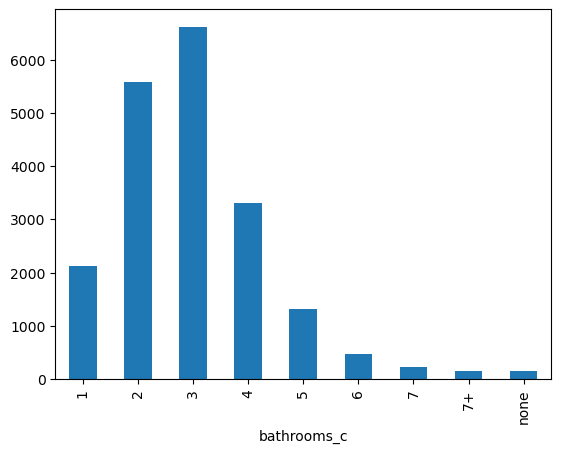

In [106]:
#bar graph
ax=egypt_prop.groupby('bathrooms_c').size().plot(kind='bar')